# Project 10-1: Use linear regression with the diamond data

## The data for this project is on the Seaborn website, named "diamonds"
### Information about the diamonds data set from Seaborn
Diamonds

price: dolar (326 - 18623)

carat: (0.2 - 5.01)

cut: (Fair, Good, Very Good, Premium, Ideal)

color: (from J(worst) to D(best))

clarity: (I1(worst), SI2, SI1, VS2, VS1, VVS1, IF(best))

x: length in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: Percentage of Total Depth = z / mean(x,y) = 2 * z / (x + y) (43-79)

table: The width of the diamond at its widest point (43-95)

In [1]:
# Import needed modules

# Import pandas and create the alias pd
import pandas as pd

# Import seaborn and create the alias sns
import seaborn as sns

# import the required sklearn modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Tasks

In [2]:
# Task 01
# Read the data from the Seaborn website, "diamonds"

data = sns.load_dataset('diamonds')


In [3]:
# Task 02, run info() and display the first five rows

data.info(memory_usage = 'deep')

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


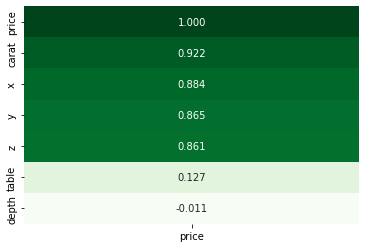

In [4]:
# Task 03, use a condensed heatmap to identify correlations for the price column
#          Sort the results, include annotation that formats to 3 decimal places 
#          and remove the color bar.

sns.heatmap(data = data.corr()[['price']].sort_values(by = 'price', ascending = False),
            cmap = 'Greens', annot = True, fmt = f'.3f',cbar = False);


In [5]:
# Task 04, Use the column with the strongest correlation to split the data into
#           test and training datasets, where the test dataset consists of 30% of the total
#           dataset. Be sure to specify a value for the random_state  parameter.

x_train, x_test, y_train, y_test = train_test_split(
data[['carat']], data[['price']], test_size = 0.30, random_state = 42)

In [6]:
# Task 05, Create a LinearRegression object, and then fit the training dataset to the model.

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
# Task 06, Score the model using the test dataset.
model.score(x_test, y_test)

0.8486858713767871

In [8]:
# Task 07, Predict the y values based on the x values in the test dataset and store the
#           the results in a variable.

y_predicted = model.predict(x_test)
y_predicted

array([[-395.24226785],
       [2244.96594868],
       [ 847.20865758],
       ...,
       [9466.71195274],
       [3254.4573256 ],
       [ 847.20865758]])

In [9]:
# Task 08, Put the predicted values in a DataFrame.

predicted = pd.DataFrame(y_predicted, columns = ['predictedprice'])

predicted.head()

,predictedprice
0,-395.242268
1,2244.965949
2,847.208658
3,1080.168206
4,9777.324684


In [10]:
# Task 09, Join the y_test data and predicted data with the x_test data, save the joined data
#            in a new DataFrame and display the first five rows of data.

combined = predicted.join([y_test.reset_index(drop = True), 
                           x_test.reset_index(drop = True)])

combined.head()

,predictedprice,price,carat
0,-395.242268,559,0.24
1,2244.965949,2201,0.58
2,847.208658,1238,0.40
3,1080.168206,1304,0.43
4,9777.324684,6901,1.55


In [11]:
combined2 = x_test.reset_index(drop = True).join([y_test.reset_index(drop = True), predicted])

combined2.head()

,carat,price,predictedprice
0,0.24,559,-395.242268
1,0.58,2201,2244.965949
2,0.40,1238,847.208658
3,0.43,1304,1080.168206
4,1.55,6901,9777.324684


In [12]:
# Task 10, Melt the actual and predicted price columns together, assigning appropriate
#            values to the variable and value names.

melted = pd.melt(combined, id_vars = ['carat'], value_vars = ['price', 'predictedprice'], 
                 var_name = 'pricetype', value_name = 'pricevalue')

melted.head()

,carat,pricetype,pricevalue
0,0.24,price,559.0
1,0.58,price,2201.0
2,0.40,price,1238.0
3,0.43,price,1304.0
4,1.55,price,6901.0


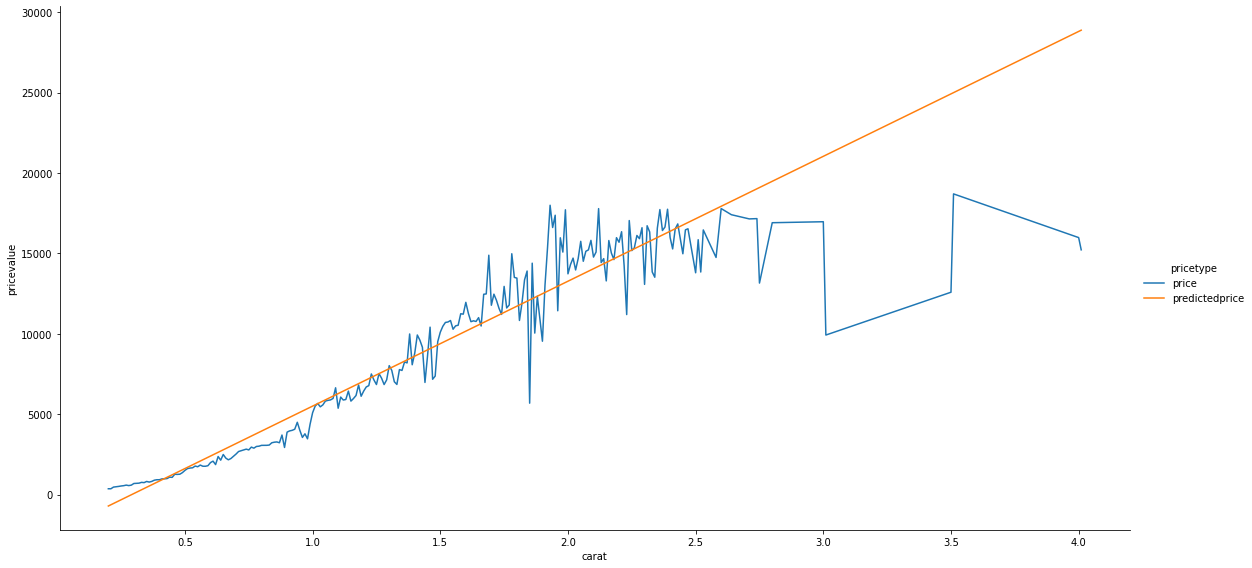

In [13]:
# Task 11, Use a Seaborn line plot without a confidence interval to plot the predicted data.

sns.relplot(data = melted, kind = 'line', x = 'carat', y = 'pricevalue', hue = 'pricetype', ci = None, height = 8, aspect = 2);